<h2><font color="#004D7F" size=6>Module 3. Data Processing Module</font></h2>

<h1><font color="#004D7F" size=5>2. Data Transformation</font></h1>

<br><br>

---

<h2><font color="#004D7F" size=5>Index</font></h2>
<a id="index"></a>

* [1. Introduction](#section1)
    * [1.1. Libraries and CSV](#section11)
* [2. Transformations](#section2)
    * [2.1. Scaling](#section21)
    * [2.2. Standardization](#section22)
    * [2.3. Normalization](#section23)
    * [2.4. Binarization](#section24)
    * [2.5. Box-Cox](#section25)
    * [2.6. Yeo-Johnson](#section26)


<a id="section1"></a>
# <font color="#004D7F"> 1. Introduction</font>

The raw, unanalyzed data is unlikely to provide robust insights as many aspects of it require the data to be in a specific form, so we need to transform the dataset. On the other hand, some algorithms may perform better if the data is prepared in a specific way, for example, tree-based algorithms with nominal feature attributes. Therefore, it is essential to preprocess our data as a fundamental part of any machine learning project.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Libraries and CSV</font>


For this practice, we will load the Pima Indian Diabetes dataset and work with different types of data transformations. Additionally, for some transformations, we will work with other datasets to see a better impact on their transformation.

On the other hand, regarding the libraries, we will call them according to each transformation. Please note that these transformations will be performed using the **Scikit-learn** library.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'data/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = names)
array = data.values

X = array[ : , 0:8] # All the characteristics of all the rows from the column 0 to 8
Y = array[ : , 8] # The target, all the rows in the last column
print(X)

[[  6.  148.   72.  ...  33.6 627.   50. ]
 [  1.   85.   66.  ...  26.6 351.   31. ]
 [  8.  183.   64.  ...  23.3 672.   32. ]
 ...
 [  5.  121.   72.  ...  26.2 245.   30. ]
 [  1.  126.   60.  ...  30.1 349.   47. ]
 [  1.   93.   70.  ...  30.4 315.   23. ]]


---
<a id="section2"></a>
## <font color="#004D7F"> 2. Transformations</font>


The fit and transform method is the preferred approach. It calls the `fit()` function to prepare the transformation parameters once on your data. Then, you can use the `transform()` function on the same data to prepare it for modeling and again on the test or validation dataset or new data that you may see in the future. Combined fit and transform is a convenience that you can use for one-time tasks. This can be useful if you are interested in plotting or summarizing the transformed data, and you will use the `fit_transform()` function. You can review the API [**sklearn.preprocessing**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). As can be seen, there is a plethora of functions that we can apply in this preprocessing phase according to our data needs.

It is important to see how the data looks before and after transformation. In the following code, you can see how the original data looks and compare it with each transformation.


<a id="section21"></a>
## <font color="#004D7F"> 2.1. Scaling</font>


This transformation is useful for optimization algorithms used in the core of machine learning algorithms like Gradient Descent. It is also useful for algorithms that weigh inputs like Regression and Neural Networks and algorithms that use distance measures like k-Nearest Neighbours. You can rescale your data using the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) class.

After scaling, you can see that all values are in the range $[0,1]$.


In [2]:
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler , meaning the scaled data will be within this range(0-1).
scaler = MinMaxScaler(feature_range=(0,1))

# Using the fit_transform method of the scaler object to transform the data in X to a specified range.
rescaledX = scaler.fit_transform(X)

# Setting the printing options for numpy arrays to display only three decimal places.
np.set_printoptions(precision=3)

print(names)

# Printing the first 5 rows of the scaled data (rescaledX) for all columns.
print(rescaledX[0:5, : ])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.353 0.744 0.59  0.354 0.    0.501 0.269 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.151 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.289 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.072 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.982 0.2  ]]


<a id="section22"></a>
## <font color="#004D7F"> 2.2. Standardization</font>


It is more suitable for techniques that assume a Gaussian distribution in the input variables and perform better with rescaled data, such as Linear Regression, Logistic Regression, and Linear Discriminant Analysis. You can standardize data using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class. The values for each attribute now have a mean value of $0$ and a standard deviation of $1$.


In [3]:
# Standardize data (0 mean ,1 stdev)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# Setting the printing options for numpy arrays to display only three decimal places.
np.set_printoptions(precision=3)

print(names)

# Printing the first 5 rows of the scaled data (rescaledX) for all columns.
print(rescaledX[0:5, : ])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.584  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.227 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.716 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.768 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.466 -0.02 ]]


<a id="section23"></a>
## <font color="#004D7F"> 2.3. Normalization</font>


This preprocessing method can be useful for sparse datasets (many zeros) with variable-scale attributes when using algorithms that weight input values such as Neural Networks and algorithms that use distance measures like k-Nearest Neighbours.

You can normalize data in Python using the [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) class. Rows are normalized to length $1$.

In [4]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
rescaledX = scaler.transform(X)

# Setting the printing options for numpy arrays to display only three decimal places.
np.set_printoptions(precision=3)

print(names)

# Printing the first 5 rows of the scaled data (rescaledX) for all columns.
print(rescaledX[0:5, : ])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.009 0.227 0.11  0.054 0.    0.052 0.962 0.077]
 [0.003 0.229 0.178 0.078 0.    0.072 0.947 0.084]
 [0.011 0.261 0.091 0.    0.    0.033 0.959 0.046]
 [0.004 0.395 0.293 0.102 0.417 0.125 0.741 0.093]
 [0.    0.06  0.017 0.015 0.073 0.019 0.995 0.014]]


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Binarization</font>


You can create new binary attributes in Python using the [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) class. You can see that all values equal to or less than 0 are marked with 0, and all values above 0 are marked with 1.


In [5]:
# binarization
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# Setting the printing options for numpy arrays to display only three decimal places.
np.set_printoptions(precision=3)

print(names)

# Printing the first 5 rows of the scaled data (rescaledX) for all columns.
print(binaryX[0:5, : ])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


<a id="section25"></a>
## <font color="#004D7F"> 2.5. Box-Cox</font>


Sometimes attributes exhibit a so-called skewness, where an attribute has a distribution similar to Gaussian but is shifted. For such cases, the Box-Cox transformation is used, which assumes that all values are positive. It aims to correct the skewness and make the distribution of this attribute more Gaussian. Note that we apply the transformation only to two attributes that seem to have skewness.


/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_1772/4207603760.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_1772/4207603760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pedi'])
/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_1772/4207603760.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level

<Figure size 640x480 with 0 Axes>

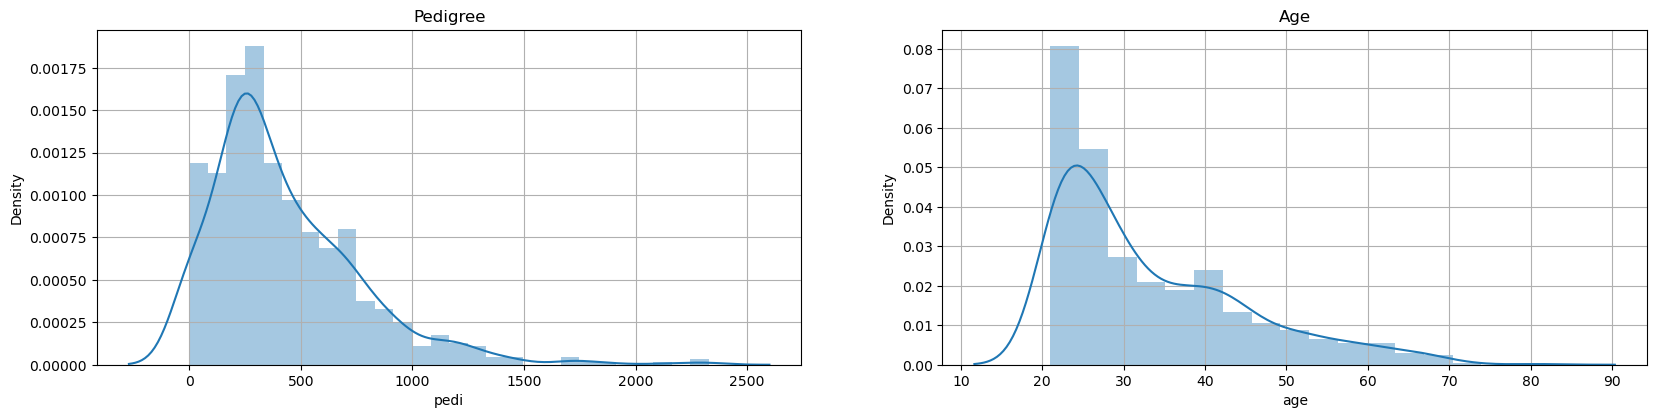

In [6]:
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(data['age'])
plt.title('Age')
plt.grid(True)
plt.show()

As we see, we need to correct this skewness, and for that, we will use the [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) class. Once the transformation is performed, we can see how the initial skewness of both features is corrected.


In [7]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer

features = data[['pedi','age']]
pt = PowerTransformer(method='box-cox',standardize=True)

skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_

skl_boxcox = pt.transform(features)

df_features = pd.DataFrame(data=skl_boxcox,columns=['pedi','age'])

# Sending the transformed characteristics to the original dataset

data.drop(['age'],axis = 1, inplace=True)
data.drop(['pedi'],axis = 1, inplace=True)
df_data = pd.concat([data, df_features],axis=1)
cols = df_data.columns.tolist()
cols

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'class', 'pedi', 'age']

In [8]:
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
df_data = df_data[cols]
df_data

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.717716,1.362797,6,148,72,35,0,33.6,1
1,0.018768,0.127990,1,85,66,29,0,26.6,0
2,0.814658,0.231506,8,183,64,0,0,23.3,1
3,-0.638772,-1.483064,1,89,66,23,94,28.1,0
4,3.167741,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-0.621159,1.764261,10,101,76,48,180,32.9,0
764,-2.130657,-0.366775,2,122,70,27,0,36.8,0
765,-0.328074,0.017237,5,121,72,23,112,26.2,0
766,0.012785,1.236934,1,126,60,0,0,30.1,1


/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_1772/2955734474.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)
/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_1772/2955734474.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['pedi'])
/var/folders/s8/rsj666js6znc64gz4k_kj85r0000gn/T/ipykernel_1772/2955734474.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

<Figure size 640x480 with 0 Axes>

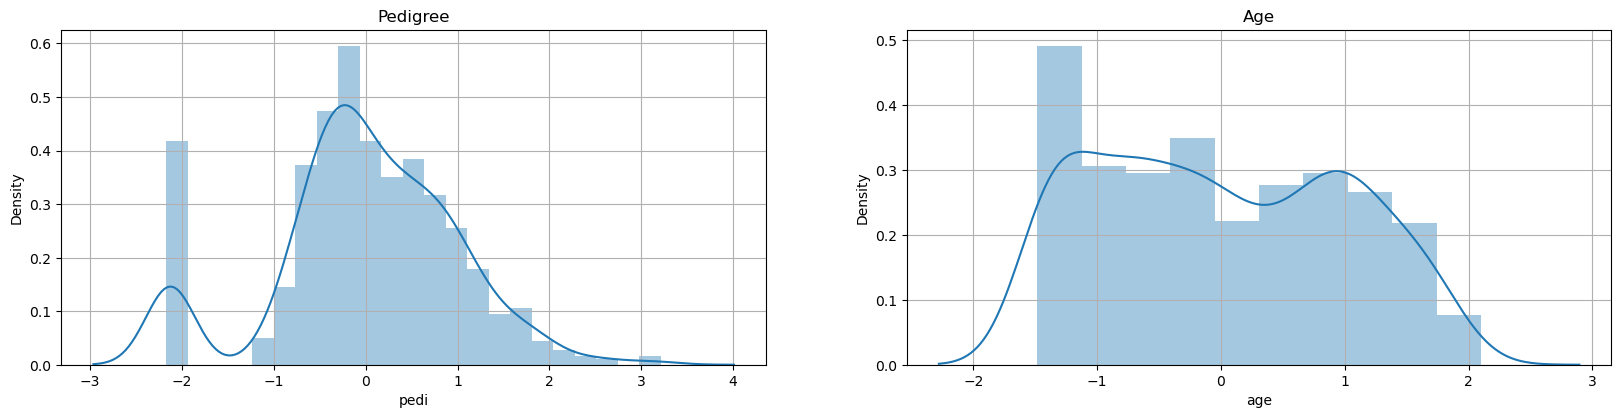

In [10]:
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(df_data['age'])
plt.title('Age')
plt.grid(True)
plt.show()

### Yeo Johnson

<a id="section26"></a>
## <font color="#004D7F"> 2.6. Yeo-Johnson</font>

Yeo-Johnson transformation is another power transformation like Box-Cox, but it supports raw (unprocessed) values that are equal to zero and negative. To use this transformation, we only need to set the `method` property of the `PowerTransformer` class to the value `yeo-johnson` or simply not specify `method` as it defaults to this transformation.


In [12]:
# Yeo-Johnson transform
from sklearn.preprocessing import PowerTransformer

features = data[['pedi','age']]
pt = PowerTransformer(method='yeo-johnson',standardize=True)

skl_boxcox = pt.fit(features)
calc_lambdas = skl_boxcox.lambdas_

skl_boxcox = pt.transform(features)

df_features = pd.DataFrame(data=skl_boxcox,columns=['pedi','age'])

# Sending the transformed characteristics to the original dataset

data.drop(['age'],axis = 1, inplace=True)
data.drop(['pedi'],axis = 1, inplace=True)
df_data = pd.concat([data, df_features],axis=1)
cols = df_data.columns.tolist()
cols


['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'class', 'pedi', 'age']